In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("AirPassengers.csv")

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
df["Month"].duplicated().sum()

0

In [7]:
df["Month"]=pd.to_datetime(df["Month"])

In [8]:
print(df["Month"].min() ,df["Month"].max())

1949-01-01 00:00:00 1960-12-01 00:00:00


In [9]:
df.shape

(144, 2)

In [10]:
a=pd.date_range(start="1949-01-01",end="1960-12-01",freq="MS")

In [11]:
a.shape

(144,)

In [12]:
print(len(set(a).intersection(set(df['Month']))))
print(len(set(a).difference(set(df['Month']))))

144
0


### No missing values btw the series now we can start next steps

In [13]:
#df.set_index("Month")

In [14]:
df1=df.copy()

In [15]:
df1["Year"]=df["Month"].dt.year
df1["Quarter"]=df["Month"].apply(lambda x: x.quarter)
df1["month"]=df1["Month"].apply(lambda x:x.month)

In [16]:
df1.head()

,Month,#Passengers,Year,Quarter,month
0,1949-01-01,112,1949,1,1
1,1949-02-01,118,1949,1,2
2,1949-03-01,132,1949,1,3
3,1949-04-01,129,1949,2,4
4,1949-05-01,121,1949,2,5


In [17]:
pt1=pd.pivot_table(data=df1,columns=["Year"],index=["month"],values=["#Passengers"])
pt1

#Passengers                                                       
Year         1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                   
1             112  115  145  171  196  204  242  284  315  340  360  417
2             118  126  150  180  196  188  233  277  301  318  342  391
3             132  141  178  193  236  235  267  317  356  362  406  419
4             129  135  163  181  235  227  269  313  348  348  396  461
5             121  125  172  183  229  234  270  318  355  363  420  472
6             135  149  178  218  243  264  315  374  422  435  472  535
7             148  170  199  230  264  302  364  413  465  491  548  622
8             148  170  199  242  272  293  347  405  467  505  559  606
9             136  158  184  209  237  259  312  355  404  404  463  508
10            119  133  162  191  211  229  274  306  347  359  407  461
11            104  114  146  172  180  203  237  271  305  310  362  390
12            118  140  166  194  201  229  278  306  336  337  405  432

In [18]:
pt2 = pd.pivot_table(data=df1,columns=['Year'],index=['Quarter'],values=['#Passengers'])
pt2

#Passengers                                                  \
Year           1949        1950        1951        1952        1953   
Quarter                                                               
1        120.666667  127.333333  157.666667  181.333333  209.333333   
2        128.333333  136.333333  171.000000  194.000000  235.666667   
3        144.000000  166.000000  194.000000  227.000000  257.666667   
4        113.666667  129.000000  158.000000  185.666667  197.333333   

                                                                     \
Year           1954        1955        1956        1957        1958   
Quarter                                                               
1        209.000000  247.333333  292.666667  324.000000  340.000000   
2        241.666667  284.666667  335.000000  375.000000  382.000000   
3        284.666667  341.000000  391.000000  445.333333  466.666667   
4        220.333333  263.000000  294.333333  329.333333  335.333333   

                                 
Year           1959        1960  
Quarter                          
1        369.333333  409.000000  
2        429.333333  489.333333  
3        523.333333  578.666667  
4        391.333333  427.666667

In [19]:
plot_data = pt1.iloc[:,-4:]
plot_data

#Passengers               
Year         1957 1958 1959 1960
month                           
1             315  340  360  417
2             301  318  342  391
3             356  362  406  419
4             348  348  396  461
5             355  363  420  472
6             422  435  472  535
7             465  491  548  622
8             467  505  559  606
9             404  404  463  508
10            347  359  407  461
11            305  310  362  390
12            336  337  405  432

In [20]:
plot_data_2 = pt2.iloc[:,-4:]
plot_data_2

#Passengers                                    
Year           1957        1958        1959        1960
Quarter                                                
1        324.000000  340.000000  369.333333  409.000000
2        375.000000  382.000000  429.333333  489.333333
3        445.333333  466.666667  523.333333  578.666667
4        329.333333  335.333333  391.333333  427.666667

In [21]:
cols=[i[1] for i in plot_data.columns]
cols

[1957, 1958, 1959, 1960]

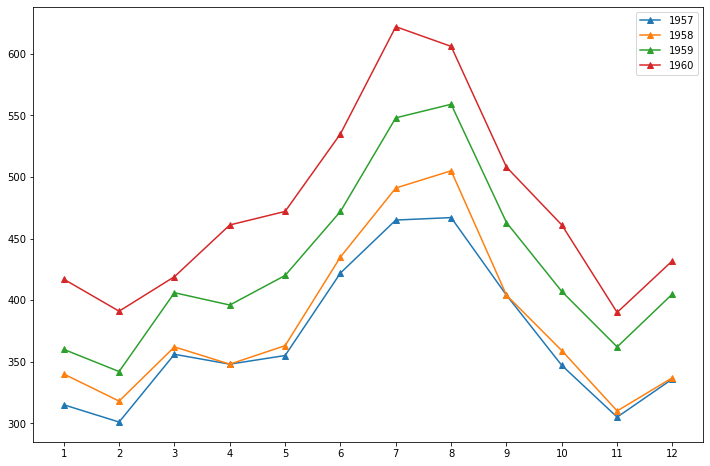

In [22]:
plt.figure(figsize=(12,8))
plt.plot(plot_data,label=cols,marker="^")
plt.legend()
plt.xticks(list(range(1,13)))
plt.show()

### Quaterwise passengers

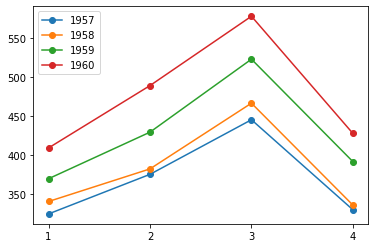

In [23]:
plt.plot(plot_data_2,label=cols,marker='o')
plt.legend()
plt.xticks(list(range(1,5)))
plt.show()

#### from the graphs we can draw a inference that in the third quarter every year there is a surge in passengers booking flights

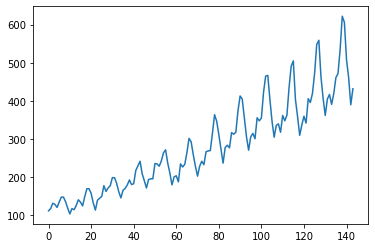

In [24]:
plt.plot(df["#Passengers"])
plt.show()

#### just from seeing the graph we can see that the graph is mulltiplicative
<b>x=constant * trend * seasonality</b>

### but we will confirm it by doing seasonal Decompose

### Seasonal Decomposition

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
d1 = df.copy()
d2 = df.set_index('Month').copy()
d3 = df.set_index('Month').copy()
d4 = df.set_index('Month').copy()

In [27]:
d2.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


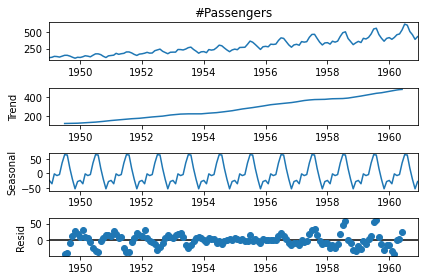

In [28]:
# Decompose time series into monthly trend, seasonal, and residual components.

decomp = seasonal_decompose(d2['#Passengers'], period = 12,model="add")
# Plot the decomposed time series to interpret.
decomp.plot();


<br>Now as you can see <b> just for clarification i put the wrong assumption that  model is addictive </b> </br>
<br>but as we can see in residuals there is a trend and our residuals must be in 0 or 1 and not have any trend </br>
<br> so we intreprete from the graph that this series is not addictive</br>

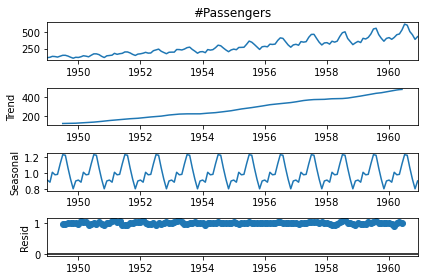

In [29]:
decomp = seasonal_decompose(d2['#Passengers'], period = 12,model="mul")
# Plot the decomposed time series to interpret.
decomp.plot();

### from the residuals we can interprete that this is a multiplicative time series

### Now Making the time series Stationary

In [30]:
d2

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


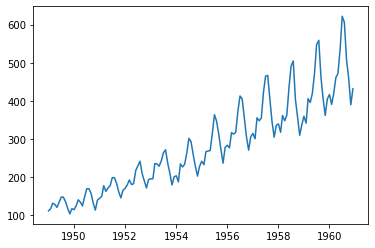

In [31]:
plt.plot(d2["#Passengers"])

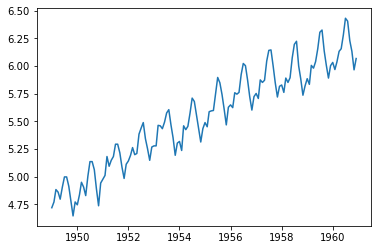

In [32]:
plt.plot(np.log(d2["#Passengers"]))

In [33]:
from scipy.stats import boxcox

In [34]:
y1,i=boxcox(d2["#Passengers"])

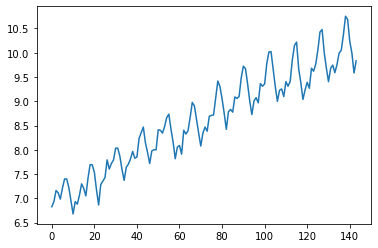

In [35]:
plt.plot(y1)

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
def adf_test(data):
    res = adfuller(data)
    print('Test_Stat',res[0])
    print('p',res[1])
    if res[1] > 0.05:
        print('Ho accepted : Data is not Stationary')
    else:
        print('H1 accepted : Data is Staionary')

In [38]:
adf_test(y1)

Test_Stat -1.3260708968567576
p 0.617162065700367
Ho accepted : Data is not Stationary


#### we need to differencing to make it stationary

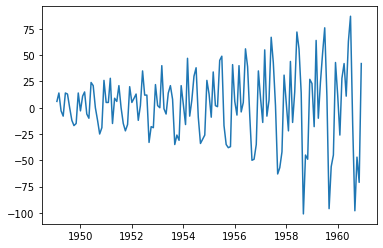

In [39]:
plt.plot(d2.diff().dropna())

In [40]:
adf_test(d2.diff().dropna())

Test_Stat -2.8292668241699994
p 0.0542132902838255
Ho accepted : Data is not Stationary


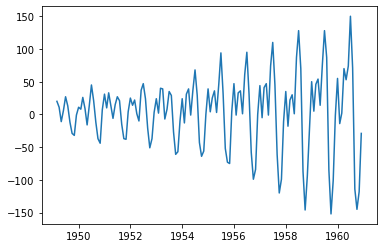

In [41]:
plt.plot(d2.diff(2).dropna())

In [42]:
adf_test(d2.diff(2).dropna())

Test_Stat -2.9616951355554244
p 0.03862975767698839
H1 accepted : Data is Staionary


Month
1949-03-01    21.565846
1949-04-01    27.209785
1949-05-01    -3.206881
1949-06-01    42.497664
1949-07-01    72.033270
1949-08-01    33.141604
1949-09-01   -48.252336
1949-10-01   -84.407639
1949-11-01   -71.055366
1949-12-01    -8.919003
1950-01-01    27.902967
1950-02-01    -8.509912
1950-03-01    21.565846
1950-04-01    27.209785
1950-05-01    -3.206881
1950-06-01    42.497664
1950-07-01    72.033270
1950-08-01    33.141604
1950-09-01   -48.252336
1950-10-01   -84.407639
1950-11-01   -71.055366
1950-12-01    -8.919003
1951-01-01    27.902967
1951-02-01    -8.509912
Name: seasonal, dtype: float64


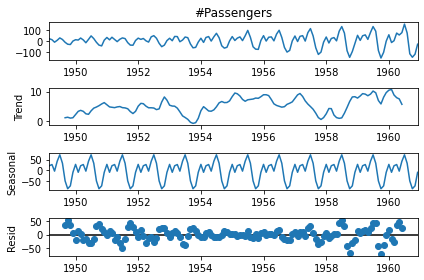

In [63]:
decomp = seasonal_decompose((d2['#Passengers']).diff(2).dropna(), period = 12)
# Plot the decomposed time series to interpret.
original = decomp.observed
trend = decomp.trend
seasonal = decomp.seasonal
decomp.plot();
print(seasonal.head(24))


In [64]:
#there is seasonal component in our data

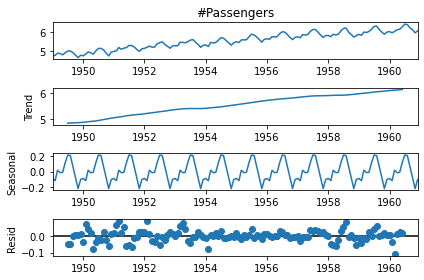

In [44]:
decomp = seasonal_decompose(np.log(d2['#Passengers']), period = 12)
# Plot the decomposed time series to interpret.
decomp.plot();

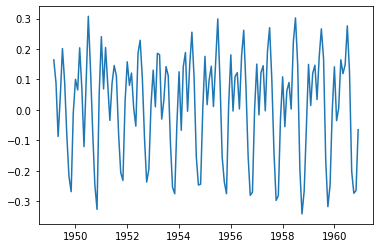

In [45]:
plt.plot(np.log(d2).diff(2).dropna())

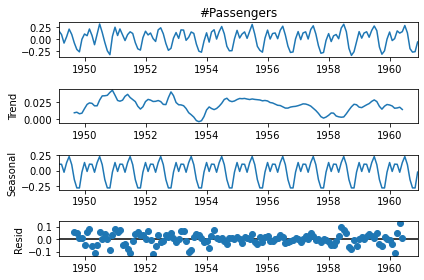

In [46]:
decomp = seasonal_decompose((np.log(d2['#Passengers'])).diff(2).dropna(), period = 12)
# Plot the decomposed time series to interpret.
decomp.plot();

In [47]:
adf_test(np.log(d2).diff(2).dropna())

Test_Stat -3.167907375288738
p 0.021919114564039218
H1 accepted : Data is Staionary


In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [59]:
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


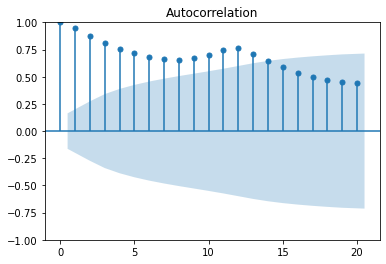

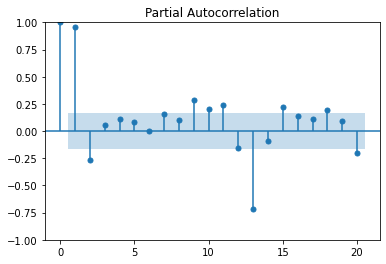

In [51]:
plot_acf(df["#Passengers"],lags=20)
plot_pacf(df["#Passengers"],lags=20)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x720 with 0 Axes>

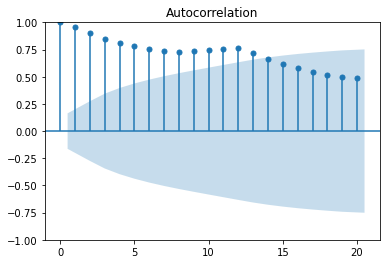

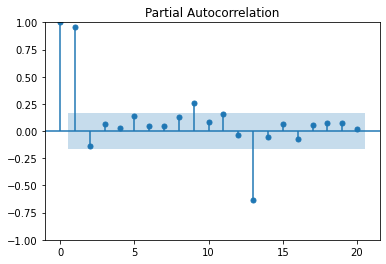

In [54]:
plt.figure(figsize=(12,10))
plot_acf(np.log(df["#Passengers"]),lags=20)
plot_pacf(np.log(df["#Passengers"]),lags=20)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x720 with 0 Axes>

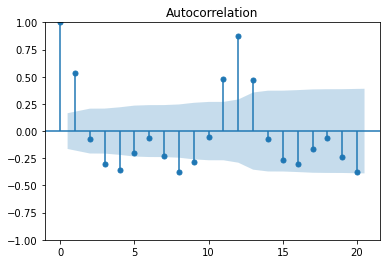

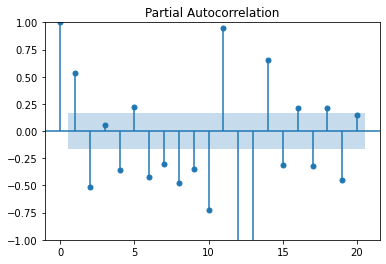

In [56]:
plt.figure(figsize=(12,10))
plot_acf(np.log(df["#Passengers"]).diff(2).dropna(),lags=20)
plot_pacf(np.log(df["#Passengers"]).diff(2).dropna(),lags=20)
plt.show()

In [70]:
d2=np.log(d2)

In [75]:
k=[i for i in range(1,13)]
l=[i for i in range(1,13)]
for i in k:
    for j in l:
        arma_model=ARIMA(d2,order=(i,2,j))
        arma_model_fit=arma_model.fit()
        aic_score=arma_model_fit.aic
        bic_score=arma_model_fit.bic
        print(f"Aic score  and bic score for  {i} and {j} is {aic_score} {bic_score}")

Aic score  and bic score for  1 and 1 is -228.19066932722347 -219.32318815441968
Aic score  and bic score for  1 and 2 is -234.2116560080595 -222.38834777765445
Aic score  and bic score for  1 and 3 is -232.3741673753832 -217.5950320873769
Aic score  and bic score for  1 and 4 is -230.42187550875815 -212.6869131631506
Aic score  and bic score for  1 and 5 is -248.31718049434141 -227.62639109113258
Aic score  and bic score for  1 and 6 is -262.9456004605464 -239.29898399973632
Aic score  and bic score for  1 and 7 is -265.0860438225818 -238.48360030417047
Aic score  and bic score for  1 and 8 is -266.77881495619334 -237.22054438018074
Aic score  and bic score for  1 and 9 is -265.5330188740638 -233.01892124044997
Aic score  and bic score for  1 and 10 is -284.1077066550987 -248.63778196388358
Aic score  and bic score for  1 and 11 is -271.7376624109743 -233.31191066215789
Aic score  and bic score for  1 and 12 is -292.2626962228462 -250.88111741642857
Aic score  and bic score for  2 and

Aic score  and bic score for  9 and 8 is -374.3281459003988 -321.1232588635761
Aic score  and bic score for  9 and 9 is -400.94500304763596 -344.784288953212
Aic score  and bic score for  9 and 10 is -381.33702410594765 -322.22048295392244
Aic score  and bic score for  9 and 11 is -398.015410341574 -335.94304213194755
Aic score  and bic score for  9 and 12 is -366.5886154168337 -301.560420149606
Aic score  and bic score for  10 and 1 is -355.1612071526022 -319.69128246138706
Aic score  and bic score for  10 and 2 is -378.3298272814292 -339.90407553261275
Aic score  and bic score for  10 and 3 is -412.65180512206143 -371.27022631564375
Aic score  and bic score for  10 and 4 is -415.25299720676924 -370.9155913427503
Aic score  and bic score for  10 and 5 is -436.08024587478553 -388.78701295316534
Aic score  and bic score for  10 and 6 is -449.7411567950172 -399.4920968157958
Aic score  and bic score for  10 and 7 is -447.3470484085736 -394.1421613717509
Aic score  and bic score for  10 a

In [66]:
# Aic score  and bic score for  2 and 10 is -237.20304497288612 -198.77729322406972

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [81]:
d2.shape

(144, 1)

In [79]:
train=d2[:101]
test=d2[101:]

In [82]:
print(train.shape,test.shape)

(101, 1) (43, 1)


In [87]:
model=ARIMA(train,order=(2,2,10))
model_fit=arma_model.fit()

In [88]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               ARIMA(12, 2, 12)   Log Likelihood                 226.714
Date:                Thu, 02 May 2024   AIC                           -403.428
Time:                        04:40:07   BIC                           -329.532
Sample:                    01-01-1949   HQIC                          -373.400
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1155      1.539     -0.075      0.940      -3.131       2.900
ar.L2         -0.0996      1.519     -0.066      0.948      -3.077       2.877
ar.L3          0.0292      1.639      0.018      0.9

In [90]:
d2.tail()

,#Passengers
Month,
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398
1960-11-01,5.966147
1960-12-01,6.068426


In [96]:
pred_start_date="1961-01-01"
pred_end_date="1961-12-01"

In [97]:
forecast=model_fit.predict(start=pred_start_date,end=pred_end_date)

In [98]:
forecast

1961-01-01    6.159430
1961-02-01    6.095885
1961-03-01    6.124381
1961-04-01    6.193109
1961-05-01    6.270606
1961-06-01    6.377882
1961-07-01    6.540141
1961-08-01    6.480174
1961-09-01    6.340690
1961-10-01    6.253253
1961-11-01    6.081830
1961-12-01    6.185441
Freq: MS, Name: predicted_mean, dtype: float64

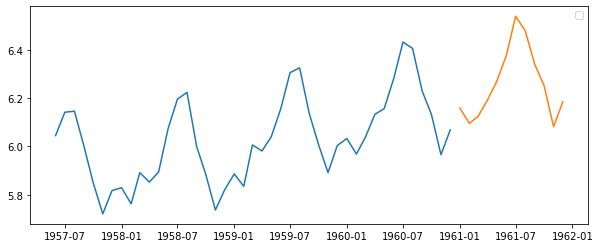

In [99]:
plt.figure(figsize=(10,4))
plt.plot(test)
plt.plot(forecast)

plt.legend("Data","Predictions")
plt.show()

<br>Our model is able to incorporate some trend and seasonality </br>
<br>from the data even when we have not applied Sarima for seasonal</br>
<br>but it is not on original actual scale we have to interprete it there if it is working fine there in forecasts</br>

In [108]:
plist = list(range(1,12)) # 8
dlist = [2]            # 2
qlist = list(range(1,12)) # 8
print(8*2*8)

128


In [109]:
train

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1957-01-01,5.752573
1957-02-01,5.707110
1957-03-01,5.874931


In [158]:
min_mse_arima = 99999999999999999999
pv = dv = qv = 0
c = 0
for i in plist:
    for j in dlist:
        for k in qlist:
            model = ARIMA(train,order=(i,j,k))
            model_fit = model.fit()
            fcast = np.exp(model_fit.forecast(len(test)))
            mse = mean_squared_error(np.exp(test),fcast)
            rmse=np.sqrt(mse)
            c += 1
            print(f'For Iteration {c},p={i},d={j},q={k},MSE={mse} ,RMSE={rmse}')
            if mse <= min_mse_arima:
                min_mse_arima = mse
                pv = i
                dv = j
                qv = k  

For Iteration 1,p=1,d=2,q=1,MSE=7134.193805924957 ,RMSE=84.46415693017339
For Iteration 2,p=1,d=2,q=2,MSE=8038.927404078103 ,RMSE=89.66006582686688
For Iteration 3,p=1,d=2,q=3,MSE=8072.289019076499 ,RMSE=89.8459182104368
For Iteration 4,p=1,d=2,q=4,MSE=7085.185778843585 ,RMSE=84.17354559981173
For Iteration 5,p=1,d=2,q=5,MSE=4896.0340079852895 ,RMSE=69.97166575111164
For Iteration 6,p=1,d=2,q=6,MSE=4823.273091462458 ,RMSE=69.44978827514493
For Iteration 7,p=1,d=2,q=7,MSE=5416.9710915907635 ,RMSE=73.60007535044215
For Iteration 8,p=1,d=2,q=8,MSE=5991.593243065386 ,RMSE=77.4053825199862
For Iteration 9,p=1,d=2,q=9,MSE=5119.713856725289 ,RMSE=71.55217576513861
For Iteration 10,p=1,d=2,q=10,MSE=4569.100966102142 ,RMSE=67.5951253131625
For Iteration 11,p=1,d=2,q=11,MSE=4720.436984886606 ,RMSE=68.70543635613274
For Iteration 12,p=2,d=2,q=1,MSE=7040.463489068494 ,RMSE=83.90746980494939
For Iteration 13,p=2,d=2,q=2,MSE=8068.110766253927 ,RMSE=89.82266287665895
For Iteration 14,p=2,d=2,q=3,MSE=

For Iteration 110,p=10,d=2,q=11,MSE=2197.176691385294 ,RMSE=46.87405136517745
For Iteration 111,p=11,d=2,q=1,MSE=820.0072589135659 ,RMSE=28.635768872400927
For Iteration 112,p=11,d=2,q=2,MSE=775.2107354253728 ,RMSE=27.84260647686155
For Iteration 113,p=11,d=2,q=3,MSE=1169.1954677929775 ,RMSE=34.19350037350633
For Iteration 114,p=11,d=2,q=4,MSE=1485.975230630601 ,RMSE=38.54834925947674
For Iteration 115,p=11,d=2,q=5,MSE=1955.6540230504995 ,RMSE=44.22277719739568
For Iteration 116,p=11,d=2,q=6,MSE=2668.4439560997357 ,RMSE=51.656983614025854
For Iteration 117,p=11,d=2,q=7,MSE=2619.2012340957585 ,RMSE=51.17813238186558
For Iteration 118,p=11,d=2,q=8,MSE=2506.4968803118127 ,RMSE=50.06492664842138
For Iteration 119,p=11,d=2,q=9,MSE=2042.338164200572 ,RMSE=45.192235662783624
For Iteration 120,p=11,d=2,q=10,MSE=2585.6787234297035 ,RMSE=50.84956955009259
For Iteration 121,p=11,d=2,q=11,MSE=2387.8924882670713 ,RMSE=48.86606683852376


In [159]:
print('Min_mse_ARIMA',min_mse_arima)
print('pv',pv,'dv',dv,'qv',qv)

Min_mse_ARIMA 588.7519234954069
pv 10 dv 2 qv 5


### RMSE=24.264210753605955 at best parameters of Arima

In [179]:
model_1=ARIMA(train,order=(10,2,5))
model_fit_1=model_1.fit()

In [180]:
print(model_fit_1.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  101
Model:                ARIMA(10, 2, 5)   Log Likelihood                 153.667
Date:                Thu, 02 May 2024   AIC                           -275.334
Time:                        07:28:18   BIC                           -233.812
Sample:                    01-01-1949   HQIC                          -258.535
                         - 05-01-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0211      0.094      0.224      0.823      -0.163       0.205
ar.L2         -0.9240      0.084    -11.029      0.000      -1.088      -0.760
ar.L3         -0.0572      0.127     -0.452      0.6

In [181]:
forecast_1=np.exp(model_fit_1.predict(start=pred_start_date,end=pred_end_date,type="level"))

In [182]:
forecast_1

1961-01-01    443.526636
1961-02-01    448.226553
1961-03-01    490.096897
1961-04-01    520.355963
1961-05-01    550.376050
1961-06-01    598.359770
1961-07-01    629.721144
1961-08-01    625.049694
1961-09-01    581.521366
1961-10-01    510.619239
1961-11-01    489.468818
1961-12-01    502.672914
Freq: MS, Name: predicted_mean, dtype: float64

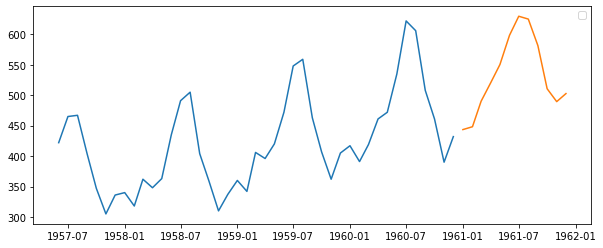

In [183]:
plt.figure(figsize=(10,4))
plt.plot(np.exp(test))
plt.plot(forecast_1)

plt.legend("Data","Predictions")
plt.show()

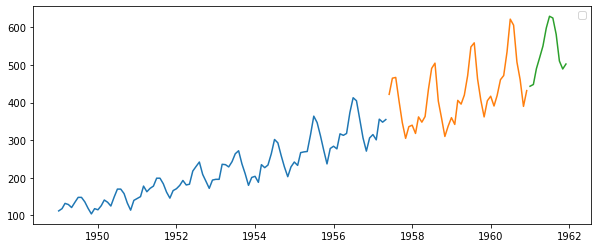

In [184]:
plt.figure(figsize=(10,4))
plt.plot(np.exp(train))
plt.plot(np.exp(test))
plt.plot(forecast_1)

plt.legend("train","Predictions")
plt.show()

#### forecast for next 1 year for passengers

In [168]:
forecast_1

1961-01-01    473.158365
1961-02-01    444.026864
1961-03-01    456.861716
1961-04-01    489.365052
1961-05-01    528.797837
1961-06-01    588.679755
1961-07-01    692.384340
1961-08-01    652.084084
1961-09-01    567.187387
1961-10-01    519.700560
1961-11-01    437.829641
1961-12-01    485.627188
Freq: MS, Name: predicted_mean, dtype: float64

In [151]:
#!pip install pmdarima 

In [152]:
# stepwise_fit=auto_arima(train,start_p=0,start_d=0,start_q=0,
#                        max_p=40,max_d=3,max_q=40,information_criterion="aic",trace=True,stepwise=True,
#                        suppress_warnings=True)

In [153]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [170]:
p = [1,2,3,4,5,6,7,8,9]  
d = [2]
q = [1,2,3,4,5,6,7,8,9]
P = [0,1,2]
D = [0,1]
Q = [0,1,2]
m  = [12]
print(6*6*3*3*2)

pdq = list(product(p,d,q))
print(pdq)
sPDQ = list(product(P,D,Q,m))
print(sPDQ)

648
[(1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (1, 2, 8), (1, 2, 9), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 2, 6), (2, 2, 7), (2, 2, 8), (2, 2, 9), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 2, 5), (3, 2, 6), (3, 2, 7), (3, 2, 8), (3, 2, 9), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4), (4, 2, 5), (4, 2, 6), (4, 2, 7), (4, 2, 8), (4, 2, 9), (5, 2, 1), (5, 2, 2), (5, 2, 3), (5, 2, 4), (5, 2, 5), (5, 2, 6), (5, 2, 7), (5, 2, 8), (5, 2, 9), (6, 2, 1), (6, 2, 2), (6, 2, 3), (6, 2, 4), (6, 2, 5), (6, 2, 6), (6, 2, 7), (6, 2, 8), (6, 2, 9), (7, 2, 1), (7, 2, 2), (7, 2, 3), (7, 2, 4), (7, 2, 5), (7, 2, 6), (7, 2, 7), (7, 2, 8), (7, 2, 9), (8, 2, 1), (8, 2, 2), (8, 2, 3), (8, 2, 4), (8, 2, 5), (8, 2, 6), (8, 2, 7), (8, 2, 8), (8, 2, 9), (9, 2, 1), (9, 2, 2), (9, 2, 3), (9, 2, 4), (9, 2, 5), (9, 2, 6), (9, 2, 7), (9, 2, 8), (9, 2, 9)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (1, 0, 0, 12)

In [171]:
min_mse_sarima = 999999999999999999
pdq_val = PDQ_val = 0
c = 0
for i in pdq:
    for j in sPDQ:
        model = SARIMAX(train,order=i,seasonal_order=j)
        sarima_fit = model.fit()
        fcast = np.exp(sarima_fit.forecast(len(test)))
        mse = mean_squared_error(np.exp(test),fcast)
        rmse=np.sqrt(mse)
        c += 1
        print(f'For Iteration {c},pdq={i},PDQ={j},MSE={mse},RMSE={rmse}')
        if mse <= min_mse_sarima:
            min_mse_sarima = mse
            pdq_val = i
            PDQ_val = j

For Iteration 1,pdq=(1, 2, 1),PDQ=(0, 0, 0, 12),MSE=7134.193805924957,RMSE=84.46415693017339
For Iteration 2,pdq=(1, 2, 1),PDQ=(0, 0, 1, 12),MSE=16995.72665301882,RMSE=130.36765953647713
For Iteration 3,pdq=(1, 2, 1),PDQ=(0, 0, 2, 12),MSE=4071.7425696804853,RMSE=63.81020740979052
For Iteration 4,pdq=(1, 2, 1),PDQ=(0, 1, 0, 12),MSE=1950.3467567326304,RMSE=44.16273040395748
For Iteration 5,pdq=(1, 2, 1),PDQ=(0, 1, 1, 12),MSE=2671.9575185921753,RMSE=51.69098101789301
For Iteration 6,pdq=(1, 2, 1),PDQ=(0, 1, 2, 12),MSE=2604.7279146137557,RMSE=51.03653509608343
For Iteration 7,pdq=(1, 2, 1),PDQ=(1, 0, 0, 12),MSE=849.5784611843915,RMSE=29.147529246651274
For Iteration 8,pdq=(1, 2, 1),PDQ=(1, 0, 1, 12),MSE=2363.310394065704,RMSE=48.613890957890874
For Iteration 9,pdq=(1, 2, 1),PDQ=(1, 0, 2, 12),MSE=2362.310445865651,RMSE=48.603605276415976
For Iteration 10,pdq=(1, 2, 1),PDQ=(1, 1, 0, 12),MSE=3400.9127740029635,RMSE=58.317345395713645
For Iteration 11,pdq=(1, 2, 1),PDQ=(1, 1, 1, 12),MSE=2062.9

For Iteration 88,pdq=(1, 2, 5),PDQ=(2, 1, 0, 12),MSE=3560.1794033363058,RMSE=59.66723894513895
For Iteration 89,pdq=(1, 2, 5),PDQ=(2, 1, 1, 12),MSE=2203.386047017699,RMSE=46.940239102689915
For Iteration 90,pdq=(1, 2, 5),PDQ=(2, 1, 2, 12),MSE=503.934642322513,RMSE=22.448488642278637
For Iteration 91,pdq=(1, 2, 6),PDQ=(0, 0, 0, 12),MSE=4823.273091462458,RMSE=69.44978827514493
For Iteration 92,pdq=(1, 2, 6),PDQ=(0, 0, 1, 12),MSE=4597.604845501483,RMSE=67.80564021894848
For Iteration 93,pdq=(1, 2, 6),PDQ=(0, 0, 2, 12),MSE=4454.694501677775,RMSE=66.74349782321703
For Iteration 94,pdq=(1, 2, 6),PDQ=(0, 1, 0, 12),MSE=1752.1827371380177,RMSE=41.85908189554589
For Iteration 95,pdq=(1, 2, 6),PDQ=(0, 1, 1, 12),MSE=2327.7104524261013,RMSE=48.24635170068407
For Iteration 96,pdq=(1, 2, 6),PDQ=(0, 1, 2, 12),MSE=2308.576174676583,RMSE=48.0476448400604
For Iteration 97,pdq=(1, 2, 6),PDQ=(1, 0, 0, 12),MSE=743.4979125859215,RMSE=27.267158131824473
For Iteration 98,pdq=(1, 2, 6),PDQ=(1, 0, 1, 12),MSE=322

For Iteration 174,pdq=(2, 2, 1),PDQ=(1, 1, 2, 12),MSE=5056.691023607289,RMSE=71.11041431188043
For Iteration 175,pdq=(2, 2, 1),PDQ=(2, 0, 0, 12),MSE=2151.488785515245,RMSE=46.38414368634226
For Iteration 176,pdq=(2, 2, 1),PDQ=(2, 0, 1, 12),MSE=1986.1427469459968,RMSE=44.56616145626631
For Iteration 177,pdq=(2, 2, 1),PDQ=(2, 0, 2, 12),MSE=1813.2375644517963,RMSE=42.58212728894361
For Iteration 178,pdq=(2, 2, 1),PDQ=(2, 1, 0, 12),MSE=3735.327025436802,RMSE=61.117321811715556
For Iteration 179,pdq=(2, 2, 1),PDQ=(2, 1, 1, 12),MSE=2713.0125139856373,RMSE=52.08658669931864
For Iteration 180,pdq=(2, 2, 1),PDQ=(2, 1, 2, 12),MSE=1924.6163056088146,RMSE=43.870449115649755
For Iteration 181,pdq=(2, 2, 2),PDQ=(0, 0, 0, 12),MSE=8068.110766253927,RMSE=89.82266287665895
For Iteration 182,pdq=(2, 2, 2),PDQ=(0, 0, 1, 12),MSE=7554.912718011515,RMSE=86.91900090320594
For Iteration 183,pdq=(2, 2, 2),PDQ=(0, 0, 2, 12),MSE=3890.0268620730812,RMSE=62.370079862647934
For Iteration 184,pdq=(2, 2, 2),PDQ=(0, 1,

For Iteration 260,pdq=(2, 2, 6),PDQ=(1, 0, 1, 12),MSE=1710.7649786369964,RMSE=41.36139478592322
For Iteration 261,pdq=(2, 2, 6),PDQ=(1, 0, 2, 12),MSE=1940.3480665482584,RMSE=44.04938213582863
For Iteration 262,pdq=(2, 2, 6),PDQ=(1, 1, 0, 12),MSE=3039.416019017891,RMSE=55.130898949843825
For Iteration 263,pdq=(2, 2, 6),PDQ=(1, 1, 1, 12),MSE=1817.156296136918,RMSE=42.6281162630595
For Iteration 264,pdq=(2, 2, 6),PDQ=(1, 1, 2, 12),MSE=2271.9846420788494,RMSE=47.66534004996554
For Iteration 265,pdq=(2, 2, 6),PDQ=(2, 0, 0, 12),MSE=2001.9583545044693,RMSE=44.74324926181009
For Iteration 266,pdq=(2, 2, 6),PDQ=(2, 0, 1, 12),MSE=2336.634130938919,RMSE=48.33874358047506
For Iteration 267,pdq=(2, 2, 6),PDQ=(2, 0, 2, 12),MSE=2182.7391066481086,RMSE=46.719793521034624
For Iteration 268,pdq=(2, 2, 6),PDQ=(2, 1, 0, 12),MSE=3685.86230157329,RMSE=60.71130291447623
For Iteration 269,pdq=(2, 2, 6),PDQ=(2, 1, 1, 12),MSE=2273.9843057290623,RMSE=47.686311513148745
For Iteration 270,pdq=(2, 2, 6),PDQ=(2, 1, 

For Iteration 346,pdq=(3, 2, 2),PDQ=(0, 1, 0, 12),MSE=476.84031565944275,RMSE=21.8366736399902
For Iteration 347,pdq=(3, 2, 2),PDQ=(0, 1, 1, 12),MSE=2510.8033396404053,RMSE=50.10791693575383
For Iteration 348,pdq=(3, 2, 2),PDQ=(0, 1, 2, 12),MSE=2481.8209069739937,RMSE=49.81787738326467
For Iteration 349,pdq=(3, 2, 2),PDQ=(1, 0, 0, 12),MSE=902.7470844914781,RMSE=30.04574985736715
For Iteration 350,pdq=(3, 2, 2),PDQ=(1, 0, 1, 12),MSE=1867.577240183465,RMSE=43.215474545392475
For Iteration 351,pdq=(3, 2, 2),PDQ=(1, 0, 2, 12),MSE=2004.6282862989244,RMSE=44.773075461698234
For Iteration 352,pdq=(3, 2, 2),PDQ=(1, 1, 0, 12),MSE=610.513707078382,RMSE=24.708575577689256
For Iteration 353,pdq=(3, 2, 2),PDQ=(1, 1, 1, 12),MSE=2449.8262900721415,RMSE=49.495719916697254
For Iteration 354,pdq=(3, 2, 2),PDQ=(1, 1, 2, 12),MSE=2466.955521519188,RMSE=49.66845600095888
For Iteration 355,pdq=(3, 2, 2),PDQ=(2, 0, 0, 12),MSE=2273.125820511859,RMSE=47.67730928347214
For Iteration 356,pdq=(3, 2, 2),PDQ=(2, 0, 

For Iteration 432,pdq=(3, 2, 6),PDQ=(2, 1, 2, 12),MSE=1453.8820881039596,RMSE=38.12980577060365
For Iteration 433,pdq=(3, 2, 7),PDQ=(0, 0, 0, 12),MSE=6568.396088471237,RMSE=81.04564200789106
For Iteration 434,pdq=(3, 2, 7),PDQ=(0, 0, 1, 12),MSE=6015.895580616677,RMSE=77.56220458842488
For Iteration 435,pdq=(3, 2, 7),PDQ=(0, 0, 2, 12),MSE=4482.288323806293,RMSE=66.94989412841736
For Iteration 436,pdq=(3, 2, 7),PDQ=(0, 1, 0, 12),MSE=1883.0746607711947,RMSE=43.39440817399397
For Iteration 437,pdq=(3, 2, 7),PDQ=(0, 1, 1, 12),MSE=2020.8999848891006,RMSE=44.95442119401717
For Iteration 438,pdq=(3, 2, 7),PDQ=(0, 1, 2, 12),MSE=1871.7856209366196,RMSE=43.264137815708516
For Iteration 439,pdq=(3, 2, 7),PDQ=(1, 0, 0, 12),MSE=783.9420936397797,RMSE=27.998965938758875
For Iteration 440,pdq=(3, 2, 7),PDQ=(1, 0, 1, 12),MSE=2222.0070256115227,RMSE=47.13816951910121
For Iteration 441,pdq=(3, 2, 7),PDQ=(1, 0, 2, 12),MSE=2342.840577085157,RMSE=48.402898436820465
For Iteration 442,pdq=(3, 2, 7),PDQ=(1, 1,

For Iteration 518,pdq=(4, 2, 2),PDQ=(2, 0, 1, 12),MSE=1899.1648430794075,RMSE=43.57940847555652
For Iteration 519,pdq=(4, 2, 2),PDQ=(2, 0, 2, 12),MSE=1965.4141723878536,RMSE=44.33299191784662
For Iteration 520,pdq=(4, 2, 2),PDQ=(2, 1, 0, 12),MSE=2851.7070247101196,RMSE=53.40137661811837
For Iteration 521,pdq=(4, 2, 2),PDQ=(2, 1, 1, 12),MSE=1572.1243667420867,RMSE=39.650023540246316
For Iteration 522,pdq=(4, 2, 2),PDQ=(2, 1, 2, 12),MSE=692.8887848574899,RMSE=26.322780720461314
For Iteration 523,pdq=(4, 2, 3),PDQ=(0, 0, 0, 12),MSE=7253.552516877249,RMSE=85.16779037216622
For Iteration 524,pdq=(4, 2, 3),PDQ=(0, 0, 1, 12),MSE=7844.526210246754,RMSE=88.569329963858
For Iteration 525,pdq=(4, 2, 3),PDQ=(0, 0, 2, 12),MSE=4413.763935929653,RMSE=66.436164367983
For Iteration 526,pdq=(4, 2, 3),PDQ=(0, 1, 0, 12),MSE=774.3343144323003,RMSE=27.826863179889685
For Iteration 527,pdq=(4, 2, 3),PDQ=(0, 1, 1, 12),MSE=1663.1867406390604,RMSE=40.782186560299344
For Iteration 528,pdq=(4, 2, 3),PDQ=(0, 1, 2,

For Iteration 604,pdq=(4, 2, 7),PDQ=(1, 1, 0, 12),MSE=3143.1523558428025,RMSE=56.06382394952027
For Iteration 605,pdq=(4, 2, 7),PDQ=(1, 1, 1, 12),MSE=2522.186038776737,RMSE=50.22137033949529
For Iteration 606,pdq=(4, 2, 7),PDQ=(1, 1, 2, 12),MSE=2795.9885098399936,RMSE=52.87710761605625
For Iteration 607,pdq=(4, 2, 7),PDQ=(2, 0, 0, 12),MSE=1987.2598303182258,RMSE=44.57869255954268
For Iteration 608,pdq=(4, 2, 7),PDQ=(2, 0, 1, 12),MSE=2218.7734846169537,RMSE=47.103858489692264
For Iteration 609,pdq=(4, 2, 7),PDQ=(2, 0, 2, 12),MSE=1975.7797830869524,RMSE=44.449744465935375
For Iteration 610,pdq=(4, 2, 7),PDQ=(2, 1, 0, 12),MSE=3811.427230505959,RMSE=61.736757531522166
For Iteration 611,pdq=(4, 2, 7),PDQ=(2, 1, 1, 12),MSE=2759.810652591295,RMSE=52.533900032182025
For Iteration 612,pdq=(4, 2, 7),PDQ=(2, 1, 2, 12),MSE=827.4358113744103,RMSE=28.765184014262974
For Iteration 613,pdq=(4, 2, 8),PDQ=(0, 0, 0, 12),MSE=24476.07014946346,RMSE=156.4482986467525
For Iteration 614,pdq=(4, 2, 8),PDQ=(0, 

For Iteration 690,pdq=(5, 2, 3),PDQ=(0, 1, 2, 12),MSE=2248.5988464047614,RMSE=47.41939314673651
For Iteration 691,pdq=(5, 2, 3),PDQ=(1, 0, 0, 12),MSE=690.8491377416884,RMSE=26.28400916416079
For Iteration 692,pdq=(5, 2, 3),PDQ=(1, 0, 1, 12),MSE=1760.2781851864816,RMSE=41.955669285407446
For Iteration 693,pdq=(5, 2, 3),PDQ=(1, 0, 2, 12),MSE=2123.5162391743684,RMSE=46.08162583041497
For Iteration 694,pdq=(5, 2, 3),PDQ=(1, 1, 0, 12),MSE=2139.4949561209437,RMSE=46.254674965034006
For Iteration 695,pdq=(5, 2, 3),PDQ=(1, 1, 1, 12),MSE=1970.1356498492062,RMSE=44.386210131629916
For Iteration 696,pdq=(5, 2, 3),PDQ=(1, 1, 2, 12),MSE=1889.6401032052809,RMSE=43.46999083511844
For Iteration 697,pdq=(5, 2, 3),PDQ=(2, 0, 0, 12),MSE=1840.8554130582563,RMSE=42.905190980326104
For Iteration 698,pdq=(5, 2, 3),PDQ=(2, 0, 1, 12),MSE=2009.8913704051097,RMSE=44.83181203570864
For Iteration 699,pdq=(5, 2, 3),PDQ=(2, 0, 2, 12),MSE=1691.3518789085626,RMSE=41.12604866636914
For Iteration 700,pdq=(5, 2, 3),PDQ=(

For Iteration 776,pdq=(5, 2, 8),PDQ=(0, 0, 1, 12),MSE=12301.127761733485,RMSE=110.91044929010741
For Iteration 777,pdq=(5, 2, 8),PDQ=(0, 0, 2, 12),MSE=3160.4554825425366,RMSE=56.2179284796455
For Iteration 778,pdq=(5, 2, 8),PDQ=(0, 1, 0, 12),MSE=854.6254542443754,RMSE=29.2339777355798
For Iteration 779,pdq=(5, 2, 8),PDQ=(0, 1, 1, 12),MSE=2631.660543298438,RMSE=51.2997128968422
For Iteration 780,pdq=(5, 2, 8),PDQ=(0, 1, 2, 12),MSE=2497.394026811918,RMSE=49.97393347348113
For Iteration 781,pdq=(5, 2, 8),PDQ=(1, 0, 0, 12),MSE=649.7324929832491,RMSE=25.489850783856095
For Iteration 782,pdq=(5, 2, 8),PDQ=(1, 0, 1, 12),MSE=1918.9418378702867,RMSE=43.80572836822014
For Iteration 783,pdq=(5, 2, 8),PDQ=(1, 0, 2, 12),MSE=2381.095277079425,RMSE=48.79646787503605
For Iteration 784,pdq=(5, 2, 8),PDQ=(1, 1, 0, 12),MSE=3067.9990654041817,RMSE=55.389521259929495
For Iteration 785,pdq=(5, 2, 8),PDQ=(1, 1, 1, 12),MSE=2212.8682062555217,RMSE=47.041133131075
For Iteration 786,pdq=(5, 2, 8),PDQ=(1, 1, 2, 1

For Iteration 862,pdq=(6, 2, 3),PDQ=(2, 1, 0, 12),MSE=3232.979704129657,RMSE=56.85929742908944
For Iteration 863,pdq=(6, 2, 3),PDQ=(2, 1, 1, 12),MSE=2228.6191140623396,RMSE=47.208252605475025
For Iteration 864,pdq=(6, 2, 3),PDQ=(2, 1, 2, 12),MSE=1610.6449534088317,RMSE=40.13284133236559
For Iteration 865,pdq=(6, 2, 4),PDQ=(0, 0, 0, 12),MSE=6629.929378881996,RMSE=81.4243782836688
For Iteration 866,pdq=(6, 2, 4),PDQ=(0, 0, 1, 12),MSE=5135.290803284332,RMSE=71.66094336027354
For Iteration 867,pdq=(6, 2, 4),PDQ=(0, 0, 2, 12),MSE=3871.558353728848,RMSE=62.221847881020445
For Iteration 868,pdq=(6, 2, 4),PDQ=(0, 1, 0, 12),MSE=806.0884528212933,RMSE=28.391696899292466
For Iteration 869,pdq=(6, 2, 4),PDQ=(0, 1, 1, 12),MSE=2136.2527891181003,RMSE=46.21961476600708
For Iteration 870,pdq=(6, 2, 4),PDQ=(0, 1, 2, 12),MSE=2375.8213759465348,RMSE=48.74239813495572
For Iteration 871,pdq=(6, 2, 4),PDQ=(1, 0, 0, 12),MSE=645.0081555172088,RMSE=25.397010759481297
For Iteration 872,pdq=(6, 2, 4),PDQ=(1, 0, 

For Iteration 948,pdq=(6, 2, 8),PDQ=(1, 1, 2, 12),MSE=2271.4786947060293,RMSE=47.66003246648106
For Iteration 949,pdq=(6, 2, 8),PDQ=(2, 0, 0, 12),MSE=1941.2967439570762,RMSE=44.060149159496454
For Iteration 950,pdq=(6, 2, 8),PDQ=(2, 0, 1, 12),MSE=2281.5227459402977,RMSE=47.765288086018046
For Iteration 951,pdq=(6, 2, 8),PDQ=(2, 0, 2, 12),MSE=1803.200074432369,RMSE=42.46410336310387
For Iteration 952,pdq=(6, 2, 8),PDQ=(2, 1, 0, 12),MSE=3927.437021952509,RMSE=62.66926696517607
For Iteration 953,pdq=(6, 2, 8),PDQ=(2, 1, 1, 12),MSE=2595.339615708981,RMSE=50.94447581150464
For Iteration 954,pdq=(6, 2, 8),PDQ=(2, 1, 2, 12),MSE=1494.8400088596152,RMSE=38.663160875174384
For Iteration 955,pdq=(6, 2, 9),PDQ=(0, 0, 0, 12),MSE=12768.570083574381,RMSE=112.99809769891873
For Iteration 956,pdq=(6, 2, 9),PDQ=(0, 0, 1, 12),MSE=4726.842944738953,RMSE=68.75203956784812
For Iteration 957,pdq=(6, 2, 9),PDQ=(0, 0, 2, 12),MSE=3217.1958794011316,RMSE=56.72033038868102
For Iteration 958,pdq=(6, 2, 9),PDQ=(0, 

For Iteration 1034,pdq=(7, 2, 4),PDQ=(1, 0, 1, 12),MSE=1468.5197674564524,RMSE=38.32127043113853
For Iteration 1035,pdq=(7, 2, 4),PDQ=(1, 0, 2, 12),MSE=1916.2609938493997,RMSE=43.775118433299525
For Iteration 1036,pdq=(7, 2, 4),PDQ=(1, 1, 0, 12),MSE=2872.7918643070443,RMSE=53.598431547080224
For Iteration 1037,pdq=(7, 2, 4),PDQ=(1, 1, 1, 12),MSE=1529.9040475481104,RMSE=39.11398787579848
For Iteration 1038,pdq=(7, 2, 4),PDQ=(1, 1, 2, 12),MSE=1999.3073000610075,RMSE=44.71361425853436
For Iteration 1039,pdq=(7, 2, 4),PDQ=(2, 0, 0, 12),MSE=1783.2453413699236,RMSE=42.22848968847836
For Iteration 1040,pdq=(7, 2, 4),PDQ=(2, 0, 1, 12),MSE=2054.527245267549,RMSE=45.32689317907801
For Iteration 1041,pdq=(7, 2, 4),PDQ=(2, 0, 2, 12),MSE=1584.8798822855715,RMSE=39.81054988675202
For Iteration 1042,pdq=(7, 2, 4),PDQ=(2, 1, 0, 12),MSE=3723.6025141499276,RMSE=61.021328354518204
For Iteration 1043,pdq=(7, 2, 4),PDQ=(2, 1, 1, 12),MSE=2476.6491760235053,RMSE=49.76594393783268
For Iteration 1044,pdq=(7, 2

For Iteration 1119,pdq=(7, 2, 9),PDQ=(0, 0, 2, 12),MSE=3108.418504562871,RMSE=55.75319277461042
For Iteration 1120,pdq=(7, 2, 9),PDQ=(0, 1, 0, 12),MSE=1016.7998619973023,RMSE=31.8872993838817
For Iteration 1121,pdq=(7, 2, 9),PDQ=(0, 1, 1, 12),MSE=1683.7211922716886,RMSE=41.03317185243774
For Iteration 1122,pdq=(7, 2, 9),PDQ=(0, 1, 2, 12),MSE=992.2088630063529,RMSE=31.499347025078993
For Iteration 1123,pdq=(7, 2, 9),PDQ=(1, 0, 0, 12),MSE=739.5835406794032,RMSE=27.19528526563756
For Iteration 1124,pdq=(7, 2, 9),PDQ=(1, 0, 1, 12),MSE=1561.872533097243,RMSE=39.520533056845814
For Iteration 1125,pdq=(7, 2, 9),PDQ=(1, 0, 2, 12),MSE=2627.0986890897234,RMSE=51.25523084612656
For Iteration 1126,pdq=(7, 2, 9),PDQ=(1, 1, 0, 12),MSE=953.913891191997,RMSE=30.8854964537078
For Iteration 1127,pdq=(7, 2, 9),PDQ=(1, 1, 1, 12),MSE=1815.4870749004954,RMSE=42.608532888383934
For Iteration 1128,pdq=(7, 2, 9),PDQ=(1, 1, 2, 12),MSE=2454.6919204066608,RMSE=49.54484756669114
For Iteration 1129,pdq=(7, 2, 9),PD

KeyboardInterrupt: 

In [ ]:
I interrupted the command 1181 iteration and choose the best one to predict 

In [172]:
print(pdq_val,PDQ_val)

(8, 2, 3) (0, 1, 0, 12)


#### RMSE=18.22733384436651 ath this paramaeeter we are getting minimum rmse so this is out best model

##### and in it it is corporating seasonal component as well

In [173]:
model_2=SARIMAX(train,order=(8,2,3),seasonal_order=(0,1,0,12))
model_fit_2=model_2.fit()

In [174]:
print(model_fit_2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         #Passengers   No. Observations:                  101
Model:             SARIMAX(8, 2, 3)x(0, 1, [], 12)   Log Likelihood                 144.252
Date:                             Thu, 02 May 2024   AIC                           -264.505
Time:                                     07:21:51   BIC                           -234.914
Sample:                                 01-01-1949   HQIC                          -252.589
                                      - 05-01-1957                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3266      0.513     -2.588      0.010      -2.331      -0.322
ar.L2         -1.2044      

In [175]:
forecast_2=np.exp(model_fit_2.predict(start=pred_start_date,end=pred_end_date,type="level"))

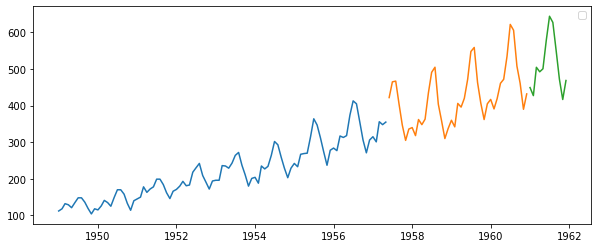

In [176]:
plt.figure(figsize=(10,4))
plt.plot(np.exp(train))
plt.plot(np.exp(test))
plt.plot(forecast_2)

plt.legend("Data","Predictions")
plt.show()

In [177]:
forecast_2

1961-01-01    449.349045
1961-02-01    427.355258
1961-03-01    504.779012
1961-04-01    492.500474
1961-05-01    500.694560
1961-06-01    578.565716
1961-07-01    644.324700
1961-08-01    627.490228
1961-09-01    549.765423
1961-10-01    472.375642
1961-11-01    416.762069
1961-12-01    468.665876
Freq: MS, Name: predicted_mean, dtype: float64

#### best predicted model with Sarimax is with order=(8,2,3),seasonal_order=(0,1,0,12)) these paramaters with RMSE =18

#### best predicted model with Arima is with order=(10,2,5) and RMSE=24